## Import delle librerie

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Import del dataset

In [2]:

from  sklearn import datasets
X, y = datasets.load_digits(return_X_y=True) #2 componenti
X1 = X.copy() #3 componenti
X_prova = X.copy() #per la prova con l'upload dell'immagine

## Analisi del dataset

1797 immagini, ciascuna da 64 features
Non ci sono righe vuote nel dataset


<BarContainer object of 10 artists>

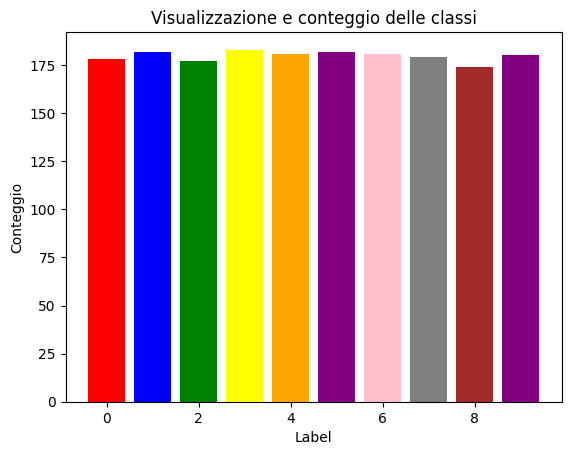

In [3]:
print(f'{X.shape[0]} immagini, ciascuna da {X.shape[1]} features')

em_rows = np.any(np.isnan(X), axis=1)
if np.any(em_rows):
    print(f'Ci sono righe vuote nel dataset: {X[em_rows]}')
else:
    print('Non ci sono righe vuote nel dataset')

fig, ax = plt.subplots()
labels, counts = np.unique(y, return_counts=True)
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'gray', 'brown', 'purple']

ax.set_title('Visualizzazione e conteggio delle classi')
ax.set_xlabel('Label')
ax.set_ylabel('Conteggio')
ax.bar(labels, counts, label=labels, color=colors)

## Applicazione del PCA con 2 componenti

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X = pca.fit_transform(X)

## Grafico

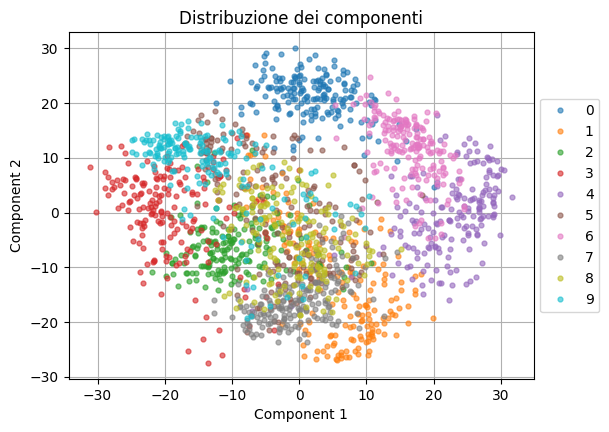

In [5]:
plt.figure(figsize=(6,4.5))
plt.grid(True)
plt.ylabel('Component 2')
plt.xlabel('Component 1')
plt.title('Distribuzione dei componenti')

for i in range(10):
    j = np.where(y == i)[0]
    plt.plot(X[..., 0][j], X[..., 1][j], '.', markersize=7, label=i, alpha=0.6)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Divisione del dataset in test e training

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

## SVM sul Training set

In [7]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

## Matrice di confusione

Accuratezza del 68%


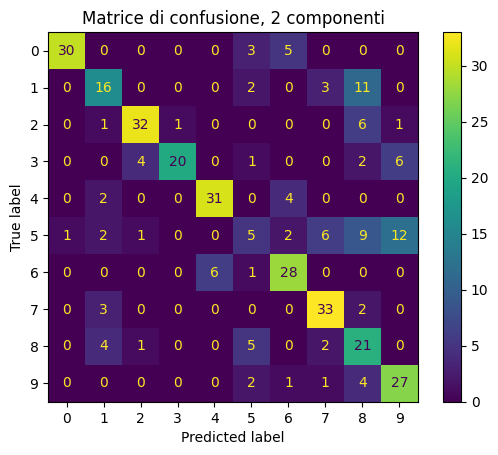

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.title('Matrice di confusione, 2 componenti')

a = accuracy_score(y_test, y_pred)
print(f'Accuratezza del {int(round(a, 2)*100)}%')

## PCA con 3 componenti

In [9]:
pca = PCA(n_components = 3)
X1 = pca.fit_transform(X1)
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 4)

# Grafico

Text(0.5, 0.92, 'Distribuzione dei componenti su 3 dimensioni')

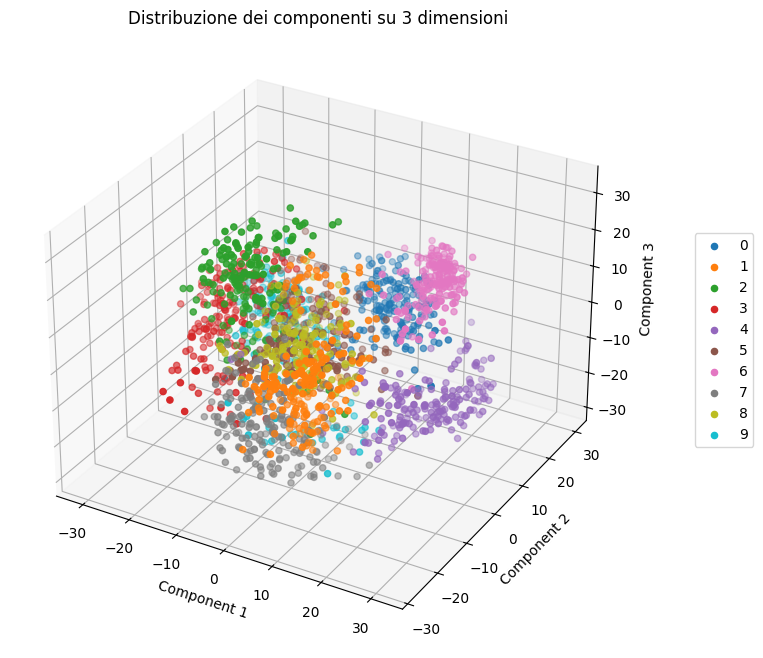

In [10]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection = '3d')

for i in range(10):
    j = np.where(y == i)[0]
    ax.scatter(X1[..., 0][j], X1[..., 1][j], X1[..., 2][j], label=i)

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.title('Distribuzione dei componenti su 3 dimensioni')

## SVM e Matrice di confusione

Accuratezza del 78%


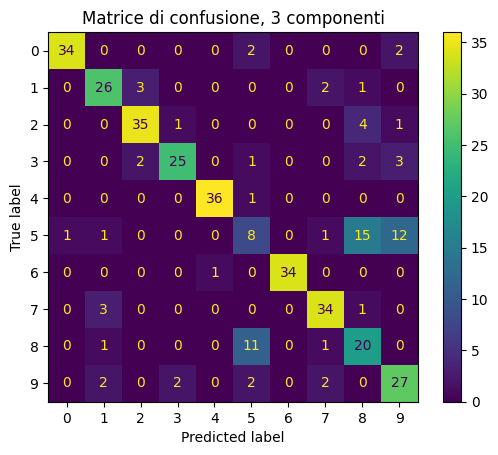

In [11]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.title('Matrice di confusione, 3 componenti')

a = accuracy_score(y_test, y_pred)
print(f'Accuratezza del {int(round(a, 2)*100)}%')

## Prova uploadando un'immagine

In [12]:
from PIL import Image

im = Image.open('test.png').convert('L') #converto l'immagine da RGB a scala di grigi
im_flat = np.array(im).flatten() #la trasformo in un vettore a una dimensione
#i pixel delle immagini del dataset hanno valori compresi tra 0 (nero) e 16 (bianco)
#di default i valori dell'immagine uploadata vanno da 0 a 255, quindi effettuiamo la normalizzazione dei pixel
im_flat = ((im_flat / 255) * 16).astype(int)

X_prova = np.vstack((X_prova, im_flat)) #aggiungo l'immagine uploadata in fondo alle altre del dataset

X_prova = pca.fit_transform(X_prova) #pca con 3 componenti
proc_im = X_prova[-1] #prelevo l'immagine

result = clf.predict([proc_im])[0]
print(f"L'immagine è un {result}")

L'immagine è un 4
